In [0]:
import pandas as pd
import numpy as np 

from sklearn.model_selection import train_test_split
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data
import numpy as np
import imageio
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
import statistics 
import tqdm

In [0]:
usc = pd.read_csv("Fly ash_USC.csv")

In [0]:
X =usc.iloc[:,1:13]
y = usc.iloc[:, 14:15]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [0]:
# cheating here!! 
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#train_x = scaler.fit_transform(X_train.values)
#train_y = scaler.fit_transform(y_train.values)
#test_x = scaler.fit_transform(X_test.values)
#test_y = scaler.fit_transform(y_test.values)

In [0]:
meany = np.mean(y_train.values) 
sdy = np.std(y_train.values)
meanx = np.mean(X_train.values) 
sdx = np.std(X_train.values)

In [0]:
train_x = ((X_train - meanx)/sdx).values
train_y = ((y_train - meany)/sdy).values
test_x = ((X_test - meanx)/sdx).values
test_y = ((y_test - meany)/sdy).values

In [0]:
X_train_s = Variable(torch.tensor(train_x))
X_test_s = Variable(torch.tensor(test_x))
y_train_s = Variable(torch.tensor(train_y))
y_test_s = Variable(torch.tensor(test_y))

In [0]:
x = X_train_s.type(torch.FloatTensor)
y = y_train_s.type(torch.FloatTensor)

In [11]:
from tqdm import tqdm
for i in tqdm(range(10000)):
  i

100%|██████████| 10000/10000 [00:00<00:00, 2741912.79it/s]


In [23]:
net = torch.nn.Sequential(
    torch.nn.Linear(12, 32),
    torch.nn.BatchNorm1d(32),
    torch.nn.ReLU(),
  #  torch.nn.Dropout(p=0.1),
    torch.nn.Linear(32, 64),
    torch.nn.BatchNorm1d(64),
    torch.torch.nn.ReLU(),  
 #   torch.nn.Dropout(p=0.1),   
    torch.nn.Linear(64, 1))


optimizer = torch.optim.SGD(net.parameters(), lr=0.1,momentum=0.9,weight_decay=0.00001) 

loss_func = torch.nn.MSELoss()  

BATCH_SIZE = 32
EPOCH = 100 # cannot be too large

torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(
    dataset=torch_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True)



los=[]
testacc =[]
trainacc = []
# start training
for epoch in tqdm(range(EPOCH)):

    for step, (batch_x, batch_y) in enumerate(loader): # for each training step
        
        b_x = Variable(batch_x)
        b_y = Variable(batch_y)

        prediction = net(b_x)     # input x and predict based on x

        loss = loss_func(prediction, b_y)     # must be (1. nn output, 2. target)

        optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients
   # print('Epoch = %d' % epoch)
  #  print('Loss = %.4f' % loss.data.numpy())
    predicted = net(Variable(X_test_s.type(torch.FloatTensor))).data.numpy()
    tpredicted = net(Variable(X_train_s.type(torch.FloatTensor))).data.numpy()
    testacc.append(sklearn.metrics.r2_score(y_test_s.data.numpy(), predicted))
    trainacc.append(sklearn.metrics.r2_score(y_train_s.data.numpy(), tpredicted))
    los.append(loss.data.numpy())



100%|██████████| 100/100 [00:05<00:00, 18.25it/s]


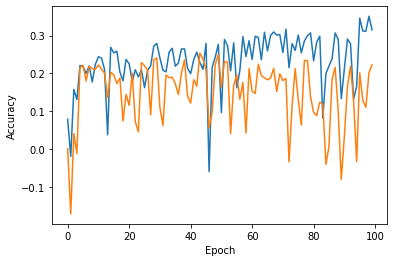

In [24]:
import matplotlib.pyplot as plt
plt.plot(trainacc)
plt.plot(testacc)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

Text(0, 0.5, 'MSE loss')

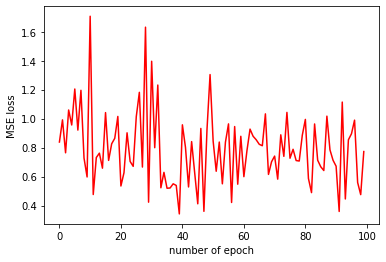

In [25]:
#plt.plot(normalised_y_test.data.numpy(), predicted,'bo')
l=[los[a].reshape(1)[0] for a in range(100)]
x_list=[]
for i in range(100):
  x_list.append(i)
plt.plot(x_list,l,'r')
plt.xlabel('number of epoch')
plt.ylabel('MSE loss')

In [26]:
with torch.no_grad():
  predicted = net(Variable(X_test_s.type(torch.FloatTensor))).data.numpy()
  tpredicted = net(Variable(X_train_s.type(torch.FloatTensor))).data.numpy()
  #y_pred_unscaled= scaler.inverse_transform(predicted)
  print(sklearn.metrics.r2_score(y_test_s.data.numpy(), predicted))
  print(sklearn.metrics.r2_score(y_train_s.data.numpy(), tpredicted))

0.2220266259245267
0.31519466803803065


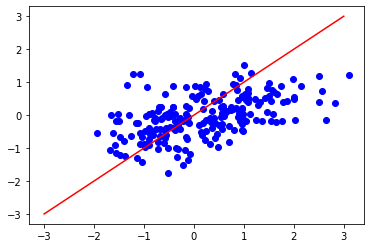

In [0]:
plt.plot(y_test_s.data.numpy(), predicted,'bo')
plt.plot([-3,3],[-3,3],'red'
)

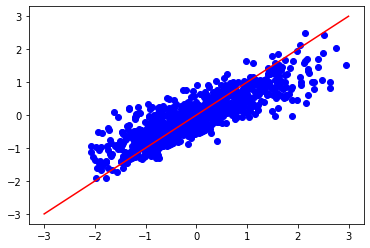

In [0]:
plt.plot(y_train_s.data.numpy(), tpredicted,'bo')
plt.plot([-3,3],[-3,3],'red'
)